# Feature Engineering

In [1]:
# Import necessary libraries

# Data manipulation and analysis
import pandas as pd
import numpy as np
import glob
import os
from pathlib import Path
import psutil # For system and process utilities

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Statistical analysis
from scipy import stats
from scipy.signal import find_peaks

# Time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Machine learning for additional insights
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

# Progress tracking
from tqdm.auto import tqdm

# Warnings management
import warnings
warnings.filterwarnings("ignore")

# Plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

print("All libraries imported successfully.")

All libraries imported successfully.


c:\Users\USER\Documents\Dechathon_N\AIT\Machine Learning\RUL_Project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load csv
data_path = "../datasets/preprocessed/primary_use_phase_rul.csv"
cycle_features = pd.read_csv(data_path)
cycle_features.head()

,Battery_ID,Cycle_Index,Protocol_ID,Discharge_Capacity(Ah)_max,Discharge_Capacity(Ah)_mean,Discharge_Capacity(Ah)_min,Charge_Capacity(Ah)_max,Charge_Capacity(Ah)_mean,Charge_Capacity(Ah)_min,Voltage(V)_max,Voltage(V)_mean,Voltage(V)_min,Voltage(V)_std,Current(A)_mean,Current(A)_std,Discharge_Energy(Wh)_max,Charge_Energy(Wh)_max,Aux_Temperature_1(C)_mean,Aux_Temperature_1(C)_max,Aux_Temperature_1(C)_min,Aux_Temperature_1(C)_std,Current(A)_abs_mean,SOH(%),RUL
0,1,1,1,2.422,0.849,0.000,2.394,2.115,0.003,4.200,3.825,3.000,0.288,-0.003,0.671,9.163,9.370,25.004,25.438,24.398,0.213,0.557,100.000,808
1,1,2,1,2.401,0.442,0.000,2.416,1.819,0.003,4.200,3.869,3.000,0.295,0.002,1.441,8.839,9.449,25.745,29.539,24.382,1.491,1.174,99.132,807
2,1,3,1,2.399,0.443,0.000,2.397,1.806,0.003,4.200,3.870,3.000,0.293,-0.001,1.442,8.836,9.377,25.800,29.626,24.458,1.469,1.174,99.077,806
3,1,4,1,2.398,0.444,0.000,2.395,1.804,0.003,4.200,3.870,3.000,0.293,-0.002,1.443,8.832,9.369,25.788,29.583,24.368,1.496,1.176,99.013,805
4,1,5,1,2.397,0.444,0.000,2.394,1.803,0.003,4.200,3.870,3.000,0.293,-0.002,1.444,8.830,9.364,25.787,29.498,24.376,1.478,1.176,98.979,804


In [3]:
# Rename columns for easier access
cycle_features.rename(columns={
    "Battery_ID": "battery_id",
    "Cycle_Index": "cycle_index",
    "Protocol_ID": "protocol_id",
    "Discharge_Capacity(Ah)_max": "discharge_capacity_ah_max",
    "Discharge_Capacity(Ah)_mean": "discharge_capacity_ah_mean",
    "Discharge_Capacity(Ah)_min": "discharge_capacity_ah_min",
    "Charge_Capacity(Ah)_max": "charge_capacity_ah_max",
    "Charge_Capacity(Ah)_mean": "charge_capacity_ah_mean",
    "Charge_Capacity(Ah)_min": "charge_capacity_ah_min",
    "Voltage(V)_max": "voltage_v_max",
    "Voltage(V)_mean": "voltage_v_mean",
    "Voltage(V)_min": "voltage_v_min",
    "Voltage(V)_std": "voltage_v_std",
    "Current(A)_mean": "current_a_mean",
    "Current(A)_std": "current_a_std",
    "Discharge_Energy(Wh)_max": "discharge_energy_wh_max",
    "Charge_Energy(Wh)_max": "charge_energy_wh_max",
    "Aux_Temperature_1(C)_mean": "aux_temperature_1_c_mean",
    "Aux_Temperature_1(C)_max": "aux_temperature_1_c_max",
    "Aux_Temperature_1(C)_min": "aux_temperature_1_c_min",
    "Aux_Temperature_1(C)_std": "aux_temperature_1_c_std",
    "Current(A)_abs_mean": "current_a_abs_mean",
    "SOH(%)": "soh_percent",
    "RUL": "rul"
}, 
inplace=True)
cycle_features.head()

,battery_id,cycle_index,protocol_id,discharge_capacity_ah_max,discharge_capacity_ah_mean,discharge_capacity_ah_min,charge_capacity_ah_max,charge_capacity_ah_mean,charge_capacity_ah_min,voltage_v_max,voltage_v_mean,voltage_v_min,voltage_v_std,current_a_mean,current_a_std,discharge_energy_wh_max,charge_energy_wh_max,aux_temperature_1_c_mean,aux_temperature_1_c_max,aux_temperature_1_c_min,aux_temperature_1_c_std,current_a_abs_mean,soh_percent,rul
0,1,1,1,2.422,0.849,0.000,2.394,2.115,0.003,4.200,3.825,3.000,0.288,-0.003,0.671,9.163,9.370,25.004,25.438,24.398,0.213,0.557,100.000,808
1,1,2,1,2.401,0.442,0.000,2.416,1.819,0.003,4.200,3.869,3.000,0.295,0.002,1.441,8.839,9.449,25.745,29.539,24.382,1.491,1.174,99.132,807
2,1,3,1,2.399,0.443,0.000,2.397,1.806,0.003,4.200,3.870,3.000,0.293,-0.001,1.442,8.836,9.377,25.800,29.626,24.458,1.469,1.174,99.077,806
3,1,4,1,2.398,0.444,0.000,2.395,1.804,0.003,4.200,3.870,3.000,0.293,-0.002,1.443,8.832,9.369,25.788,29.583,24.368,1.496,1.176,99.013,805
4,1,5,1,2.397,0.444,0.000,2.394,1.803,0.003,4.200,3.870,3.000,0.293,-0.002,1.444,8.830,9.364,25.787,29.498,24.376,1.478,1.176,98.979,804


## Feature Engineering Formulas

**1. Rolling Mean (Trend)**
This calculates the average of the feature over a recent window ($w$) of cycles (e.g., $w=10$).

$$
\text{Rolling\_Mean}(\text{cycle}_n) = \frac{1}{w} \sum_{i=n-w+1}^{n} \text{Feature}(\text{cycle}_i)
$$

* *Examples:* `SOH_rolling_mean`, `Temp_rolling_mean`.

**2. Rolling Standard Deviation (Volatility)**
This measures the stability of a feature over a recent window ($w$). It calculates the standard deviation of the $w$ previous cycles.

$$
\text{Rolling\_Std}(\text{cycle}_n) = \sqrt{\frac{1}{w-1} \sum_{i=n-w+1}^{n} (\text{Feature}(\text{cycle}_i) - \text{Rolling\_Mean})^2}
$$

* *Example:* `SOH_rolling_std` (where `Rolling_Mean` is the one calculated in step 3).

In [4]:
# Calculate Rolling Mean Features (Window size of 5 cycles)
rolling_mean_features = [
    'discharge_capacity_ah_max',
    'charge_capacity_ah_max',
    'voltage_v_max',
    'current_a_mean',
    'discharge_energy_wh_max',
    'charge_energy_wh_max',
    'aux_temperature_1_c_mean',
    'current_a_abs_mean',
    'soh_percent',
] # List of features
for feature in rolling_mean_features:
    rolling_mean_col_name = f'rolling_mean_{feature}'
    cycle_features[rolling_mean_col_name] = cycle_features.groupby('battery_id')[feature].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
cycle_features.head()

,battery_id,cycle_index,protocol_id,discharge_capacity_ah_max,discharge_capacity_ah_mean,discharge_capacity_ah_min,charge_capacity_ah_max,charge_capacity_ah_mean,charge_capacity_ah_min,voltage_v_max,voltage_v_mean,voltage_v_min,voltage_v_std,current_a_mean,current_a_std,discharge_energy_wh_max,charge_energy_wh_max,aux_temperature_1_c_mean,aux_temperature_1_c_max,aux_temperature_1_c_min,aux_temperature_1_c_std,current_a_abs_mean,soh_percent,rul,rolling_mean_discharge_capacity_ah_max,rolling_mean_charge_capacity_ah_max,rolling_mean_voltage_v_max,rolling_mean_current_a_mean,rolling_mean_discharge_energy_wh_max,rolling_mean_charge_energy_wh_max,rolling_mean_aux_temperature_1_c_mean,rolling_mean_current_a_abs_mean,rolling_mean_soh_percent
0,1,1,1,2.422,0.849,0.000,2.394,2.115,0.003,4.200,3.825,3.000,0.288,-0.003,0.671,9.163,9.370,25.004,25.438,24.398,0.213,0.557,100.000,808,2.422,2.394,4.200,-0.003,9.163,9.370,25.004,0.557,100.000
1,1,2,1,2.401,0.442,0.000,2.416,1.819,0.003,4.200,3.869,3.000,0.295,0.002,1.441,8.839,9.449,25.745,29.539,24.382,1.491,1.174,99.132,807,2.411,2.405,4.200,-0.001,9.001,9.409,25.374,0.865,99.566
2,1,3,1,2.399,0.443,0.000,2.397,1.806,0.003,4.200,3.870,3.000,0.293,-0.001,1.442,8.836,9.377,25.800,29.626,24.458,1.469,1.174,99.077,806,2.407,2.402,4.200,-0.001,8.946,9.398,25.516,0.968,99.403
3,1,4,1,2.398,0.444,0.000,2.395,1.804,0.003,4.200,3.870,3.000,0.293,-0.002,1.443,8.832,9.369,25.788,29.583,24.368,1.496,1.176,99.013,805,2.405,2.400,4.200,-0.001,8.917,9.391,25.584,1.020,99.306
4,1,5,1,2.397,0.444,0.000,2.394,1.803,0.003,4.200,3.870,3.000,0.293,-0.002,1.444,8.830,9.364,25.787,29.498,24.376,1.478,1.176,98.979,804,2.403,2.399,4.200,-0.001,8.900,9.386,25.625,1.051,99.240


In [5]:
# Calculate Rolling Std Features (Window size of 5 cycles)
rolling_std_features = [
    'discharge_capacity_ah_max',
    'charge_capacity_ah_max',
    'voltage_v_max',
    'current_a_mean',
    'discharge_energy_wh_max',
    'charge_energy_wh_max',
    'aux_temperature_1_c_mean',
    'current_a_abs_mean',
    'soh_percent',
] # List of features
for feature in rolling_std_features:
    rolling_std_col_name = f'rolling_std_{feature}'
    cycle_features[rolling_std_col_name] = cycle_features.groupby('battery_id')[feature].transform(lambda x: x.rolling(window=5, min_periods=1).std().fillna(0))
cycle_features.head()

,battery_id,cycle_index,protocol_id,discharge_capacity_ah_max,discharge_capacity_ah_mean,discharge_capacity_ah_min,charge_capacity_ah_max,charge_capacity_ah_mean,charge_capacity_ah_min,voltage_v_max,voltage_v_mean,voltage_v_min,voltage_v_std,current_a_mean,current_a_std,discharge_energy_wh_max,charge_energy_wh_max,aux_temperature_1_c_mean,aux_temperature_1_c_max,aux_temperature_1_c_min,aux_temperature_1_c_std,current_a_abs_mean,soh_percent,rul,rolling_mean_discharge_capacity_ah_max,rolling_mean_charge_capacity_ah_max,rolling_mean_voltage_v_max,rolling_mean_current_a_mean,rolling_mean_discharge_energy_wh_max,rolling_mean_charge_energy_wh_max,rolling_mean_aux_temperature_1_c_mean,rolling_mean_current_a_abs_mean,rolling_mean_soh_percent,rolling_std_discharge_capacity_ah_max,rolling_std_charge_capacity_ah_max,rolling_std_voltage_v_max,rolling_std_current_a_mean,rolling_std_discharge_energy_wh_max,rolling_std_charge_energy_wh_max,rolling_std_aux_temperature_1_c_mean,rolling_std_current_a_abs_mean,rolling_std_soh_percent
0,1,1,1,2.422,0.849,0.000,2.394,2.115,0.003,4.200,3.825,3.000,0.288,-0.003,0.671,9.163,9.370,25.004,25.438,24.398,0.213,0.557,100.000,808,2.422,2.394,4.200,-0.003,9.163,9.370,25.004,0.557,100.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,1,2,1,2.401,0.442,0.000,2.416,1.819,0.003,4.200,3.869,3.000,0.295,0.002,1.441,8.839,9.449,25.745,29.539,24.382,1.491,1.174,99.132,807,2.411,2.405,4.200,-0.001,9.001,9.409,25.374,0.865,99.566,0.015,0.016,0.000,0.004,0.229,0.056,0.524,0.436,0.614
2,1,3,1,2.399,0.443,0.000,2.397,1.806,0.003,4.200,3.870,3.000,0.293,-0.001,1.442,8.836,9.377,25.800,29.626,24.458,1.469,1.174,99.077,806,2.407,2.402,4.200,-0.001,8.946,9.398,25.516,0.968,99.403,0.013,0.012,0.000,0.003,0.188,0.043,0.445,0.356,0.518
3,1,4,1,2.398,0.444,0.000,2.395,1.804,0.003,4.200,3.870,3.000,0.293,-0.002,1.443,8.832,9.369,25.788,29.583,24.368,1.496,1.176,99.013,805,2.405,2.400,4.200,-0.001,8.917,9.391,25.584,1.020,99.306,0.011,0.011,0.000,0.002,0.163,0.038,0.388,0.309,0.465
4,1,5,1,2.397,0.444,0.000,2.394,1.803,0.003,4.200,3.870,3.000,0.293,-0.002,1.444,8.830,9.364,25.787,29.498,24.376,1.478,1.176,98.979,804,2.403,2.399,4.200,-0.001,8.900,9.386,25.625,1.051,99.240,0.010,0.010,0.000,0.002,0.147,0.036,0.348,0.276,0.429


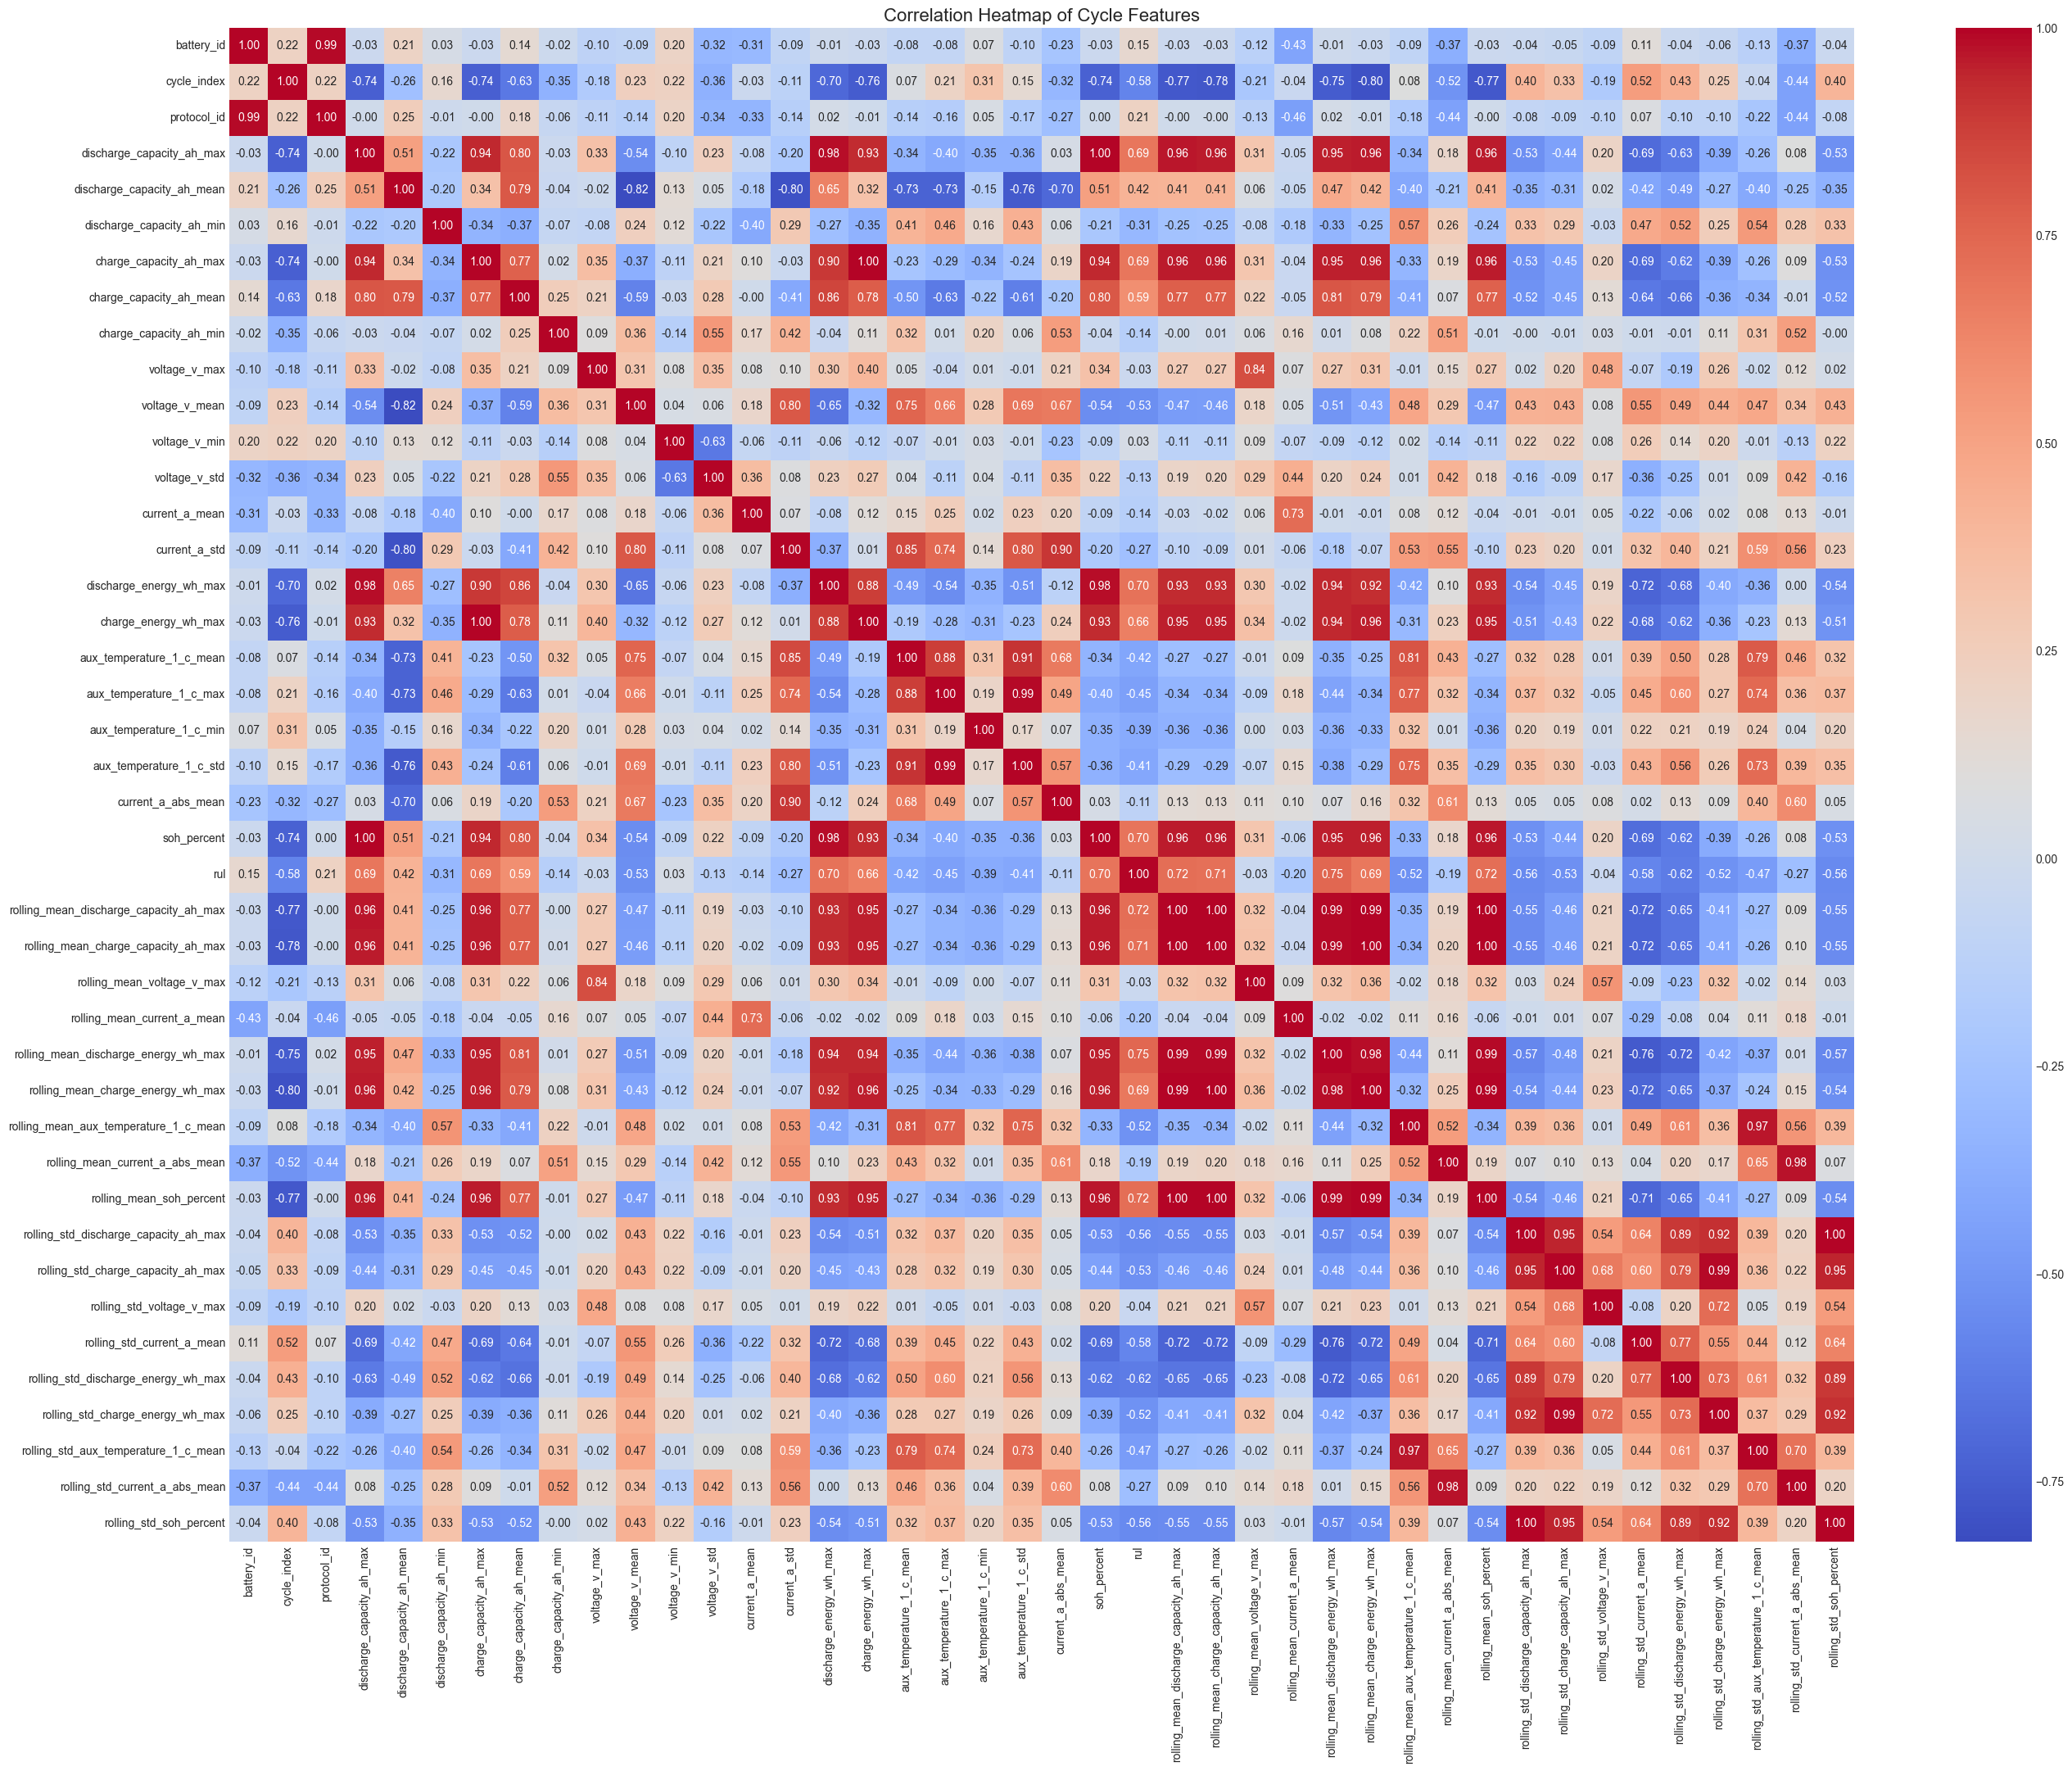

In [6]:
# Draw Correlation Heatmap
plt.figure(figsize=(32, 24))
corr_matrix = cycle_features.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Cycle Features', fontsize=16)
plt.show()

In [ ]:
# Show only correlations with RUL greater than 0.1
rul_correlations = corr_matrix['rul'].abs()
significant_correlations = rul_correlations[rul_correlations > 0.1].sort_values(ascending=False)
significant_correlations

rul                                      1.000
rolling_mean_discharge_energy_wh_max     0.747
rolling_mean_soh_percent                 0.720
rolling_mean_discharge_capacity_ah_max   0.717
rolling_mean_charge_capacity_ah_max      0.714
discharge_energy_wh_max                  0.704
soh_percent                              0.696
discharge_capacity_ah_max                0.693
charge_capacity_ah_max                   0.688
rolling_mean_charge_energy_wh_max        0.685
charge_energy_wh_max                     0.656
rolling_std_discharge_energy_wh_max      0.617
charge_capacity_ah_mean                  0.594
cycle_index                              0.581
rolling_std_current_a_mean               0.576
rolling_std_discharge_capacity_ah_max    0.556
rolling_std_soh_percent                  0.556
voltage_v_mean                           0.531
rolling_std_charge_capacity_ah_max       0.529
rolling_mean_aux_temperature_1_c_mean    0.523
rolling_std_charge_energy_wh_max         0.523
rolling_std_a

In [8]:
# Save the updated dataframe with new features
output_path = "../datasets/preprocessed/final_df.csv"
cycle_features.to_csv(output_path, index=False)
print(f"Updated dataframe saved to {output_path}")

Updated dataframe saved to ../datasets/preprocessed/final_df.csv


In [9]:
cycle_features.shape

(49181, 42)